# 03b: Face Cascades (part 2)

Use haarcascades to detect a face in an image



In [1]:
import os
import os.path as osp
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
%reload_ext autoreload
%autoreload 2
from utils import imx
from config import config as cfg

Haarcascades are an efficient way to detect a face in an image. There are 4 pretrained cascades that are included with OpenCV. 

# Detection Profiles

In [7]:
# Try the other cascades
#cascade = 'haarcascade_frontalface_default.xml'
#cascade = 'haarcascade_frontalface_alt.xml'
cascade = 'haarcascade_frontalface_alt2.xml'
#cascade = 'haarcascade_frontalface_alt_tree.xml'
#cascade = 'haarcascade_mcs_nose.xml'
#cascade = 'haarcascade_eye.xml'
#cascade = 'haarcascade_mcs_mouth.xml'

classifier = cv2.CascadeClassifier(osp.join(cfg.MODELS_DIR,'opencv',cascade))

In [9]:
# Read an image and display it
fpath = osp.join(cfg.IMAGES_DIR,'test/obama.jpg')
im = cv2.imread(fpath)

In [10]:
# detect faces
faces = imx.detect_faces(classifier,im)
print('Found {} face(s)'.format(len(faces)))

Found 1 face(s)


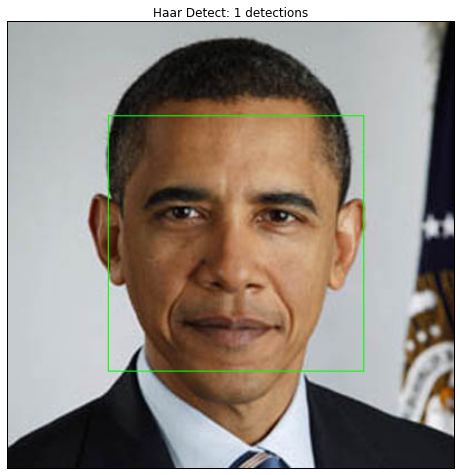

In [11]:
# Draw faces
dst = im.copy()
for face in faces:
    x1,y1,x2,y2 = face
    cv2.rectangle(dst,(x1,y1),(x2,y2),(0,255,0),1)

title='Haar Detect: {} detections'.format(len(faces))
imx.pltimg(dst,mode='bgr',title=title)

# Plot Combined

In [12]:
# Use 4 cascades together
cascades = ['haarcascade_frontalface_default.xml','haarcascade_frontalface_alt.xml',
            'haarcascade_frontalface_alt2.xml','haarcascade_frontalface_alt_tree.xml']
colors = [(0,255,0),(255,0,0),(0,0,255),(255,0,255)]
names = ['frontal','alt','alt2','alt_tree']
classifiers = [cv2.CascadeClassifier(osp.join(cfg.MODELS_DIR,'opencv',c)) for c in cascades]

In [13]:
# detect faces
faces_cascades = [imx.detect_faces(c,im) for c in classifiers]

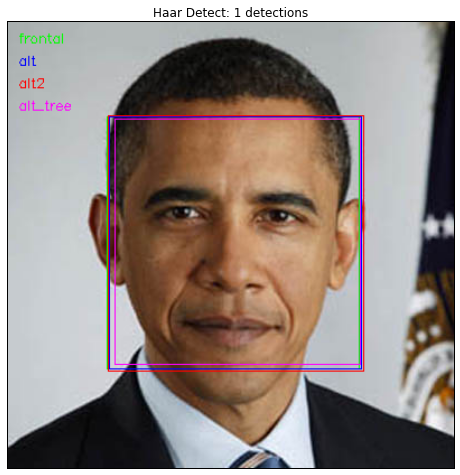

In [15]:
# Draw faces
dst = im.copy()
ypos = 20
ymargin = 20
for i,faces in enumerate(faces_cascades):
    clr = colors[i]
    name = names[i]
    for face in faces:
        x1,y1,x2,y2 = face
        cv2.rectangle(dst,(x1,y1),(x2,y2),clr,1)
    tp = (10,(i*ymargin)+ypos)
    cv2.putText(dst, name, tp, cv2.FONT_HERSHEY_SIMPLEX, .4,clr)
        
title='Haar Detect: {} detections'.format(len(faces))
imx.pltimg(dst,mode='bgr',title=title)

In [20]:
# Save the image as a PNG
fpath_out = osp.join(cfg.OUTPUT_DIR,'ch3_good_quality_text.png')
cv2.imwrite(fpath_out,dst)

True

In [21]:
# Save the image as a JPG, notice the poor quality of the text
fpath_out = osp.join(cfg.OUTPUT_DIR,'ch3_all_poor_quality_text.jpg')
cv2.imwrite(fpath_out,dst)

True